## A Hybrid Movie Recommendation System Project

### Business Problem

The movie streaming platform wants to help users find movies they will like. When there are thousands of movies to choose from, users get overwhelmed and frustrated. Bad recommendations make users unhappy and cause them to leave the platform.

New users face an extra problem - they have not watched many movies yet, so it is hard to know what they like. This is called the "cold-start problem."

Our ***Goal** is to build a recommendation system that suggests movies that each user will enjoy, based on what they have watched before. The system should work well even when users are new or have watched only a few movies.

**Solution:** We combine two approaches:
1. **Collaborative Filtering** - Find recommendations using ratings from similar users
2. **Content-Based Filtering** - Find recommendations using movie tags and descriptions

This hybrid approach gives better, more accurate movie suggestions that keep users happy and engaged on the platform.

### Project Objectives
The objective of this project is to design and evaluate a hybrid movie recommendation system that provides personalized movie suggestions to users based on their historical preferences and content similarity.
Specifically, this project aims to:
- Build a collaborative filtering recommendation model using user–movie rating data to predict unseen ratings.
- Evaluate the collaborative filtering model using appropriate regression metrics, such as **RMSE** and **MAE**, to assess performance on unseen data.
- Develop a content-based recommendation component using user-generated movie tags to identify similar movies.
- Integrate collaborative filtering and content-based approaches into a hybrid recommendation system to address the cold-start problem.
- Generate and present **top-5 personalized movie recommendations** for users in a clear and interpretable manner.
- Demonstrate a clear modeling workflow, including data preparation, validation strategy, and result interpretation, suitable for a data science audience.
different words but simple english in the markdown

### Data cleaning


#### 1. Load the data

In [1]:
### load the data
import pandas as pd
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
tags = pd.read_csv("tags.csv")

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/victor/anaconda3/lib/python3.13/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/victor/anaconda3/lib/python3.13/site-packages/zmq/eventloop/zmqstream.py", line 575, in _log_error
    f.result()
    ~~~~~~~~^^
  File "/home/victor/anaconda3/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
               ^^^^^^^^^^^^^^^^^^
  File "/home/victor/anaconda3/lib/python3.13/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
                     ~~~~~~~~^^^^^^^^^^
  File "/home/victor/anaconda3/lib/p

#### View the datasets

In [2]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### 2. Check on the summary


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


### 3. Handling missing values

In [8]:
### check for missing values in tags
tags.isnull().sum()


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [9]:
### check for missing values in movies
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
### check for missing values in ratings
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### 4. Removing duplicates

In [11]:
### Check for any duplicates in the datasets
print(f"Duplicates in ratings: {ratings.duplicated().sum()}")
print(f"Duplicates in movies: {movies.duplicated().sum()}")
print(f"Duplicates in tags: {tags.duplicated().sum()}")


Duplicates in ratings: 0
Duplicates in movies: 0
Duplicates in tags: 0


### 5. Filter sparse users and items

In [12]:
### Check for any sparse data in ratings
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Number of unique movies: {ratings['movieId'].nunique()}")
print(f"Total ratings: {ratings.shape[0]}")
print(f"Ratings per user (mean): {ratings.groupby('userId').size().mean()}")
print(f"Ratings per movie (mean): {ratings.groupby('movieId').size().mean()}")

Number of unique users: 610
Number of unique movies: 9724
Total ratings: 100836
Ratings per user (mean): 165.30491803278687
Ratings per movie (mean): 10.369806663924312


### 6. Handling Outliers

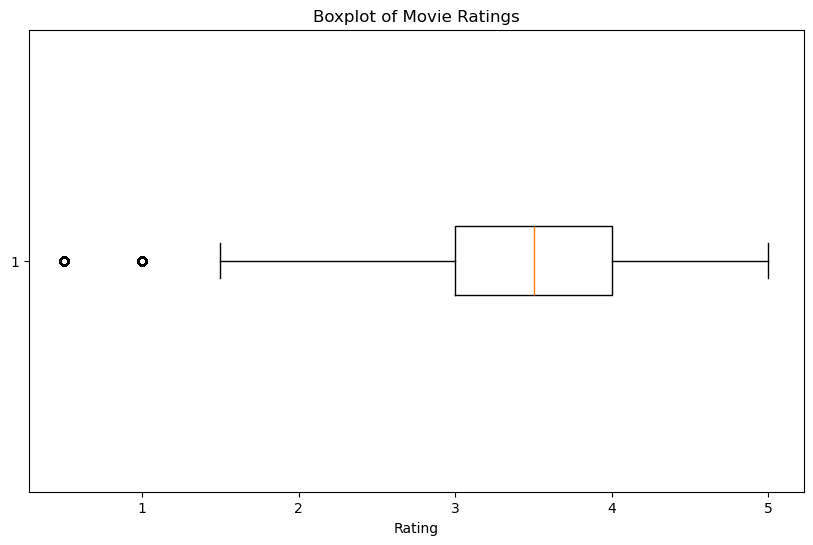

In [13]:
### Check for any outliers in ratings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(ratings['rating'], vert=False)
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

### Outliers
Although a few ratings appear as outliers in the boxplot, they were not removed or modified.

In a recommendation system, very low or very high ratings are valid user feedback, not errors. These values show strong user preferences and are important for learning what users like and dislike. Removing them could reduce the quality of recommendations.

All ratings fall within the valid rating scale, and there is no evidence of incorrect data. Therefore, keeping the outliers helps preserve real user behavior and avoids unnecessary data manipulation or potential data leakage.

### 7. Clean text data

In [14]:
### In movie dataset, check for any wrong punctuation and numbering in titles
movies['title'].head(20)


0                          Toy Story (1995)
1                            Jumanji (1995)
2                   Grumpier Old Men (1995)
3                  Waiting to Exhale (1995)
4        Father of the Bride Part II (1995)
5                               Heat (1995)
6                            Sabrina (1995)
7                       Tom and Huck (1995)
8                       Sudden Death (1995)
9                          GoldenEye (1995)
10           American President, The (1995)
11       Dracula: Dead and Loving It (1995)
12                             Balto (1995)
13                             Nixon (1995)
14                  Cutthroat Island (1995)
15                            Casino (1995)
16             Sense and Sensibility (1995)
17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
19                       Money Train (1995)
Name: title, dtype: object

In [15]:
### Ensure in the movie dataset and tag dataset have consistent genre and tag formats
movies['genres'] = movies['genres'].str.lower()
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy
1,2,Jumanji (1995),adventure|children|fantasy
2,3,Grumpier Old Men (1995),comedy|romance
3,4,Waiting to Exhale (1995),comedy|drama|romance
4,5,Father of the Bride Part II (1995),comedy


In [16]:
tags['tag'] = tags['tag'].str.lower()
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,boxing story,1445715207
4,2,89774,mma,1445715200


In [17]:
tags = tags.drop(columns=['timestamp'])
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,highly quotable
2,2,60756,will ferrell
3,2,89774,boxing story
4,2,89774,mma


 ### 8. Aligning / Encoding IDs Properly

To maintain consistency, the movies and tags datasets include only films present in the ratings data.

In [18]:
valid_movie_ids = set(ratings['movieId'])

movies = movies[movies['movieId'].isin(valid_movie_ids)]
tags = tags[tags['movieId'].isin(valid_movie_ids)]
movie_tags = (
    tags.groupby('movieId')['tag'] # Group by movieId
    .apply(lambda x: ' '.join(x)) # Join tags with space
    .reset_index() # Reset index to turn groupby object back to DataFrame
)
movie_tags.head()

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game robin williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


 The  above performs data cleaning and preprocessing on movie recommendation datasets, ensuring consistency in text formats, removing unnecessary columns, and filtering datasets to include only relevant movie IDs present in the ratings dataset.